In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28,28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images/255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1470 - accuracy: 0.9547
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0330 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0207 - accuracy: 0.9933


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.0492 - accuracy: 0.9861 - 3s/epoch - 9ms/step


In [ ]:
print(test_acc)

0.9861000180244446


313/313 [==============================] - 4s 11ms/step


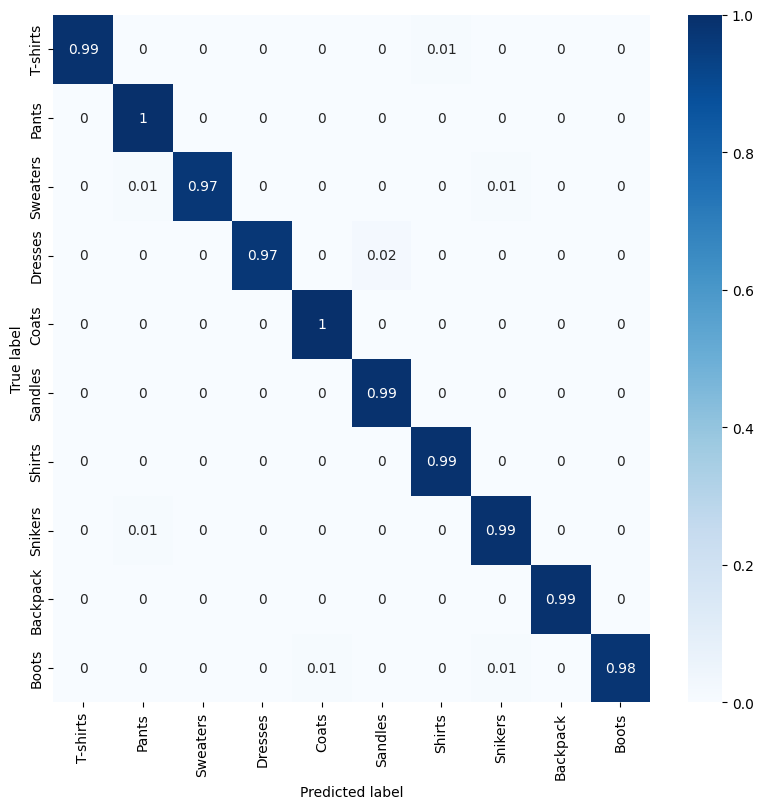

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

IMAGES = [
    "T-shirts",
    "Pants",
    "Sweaters",
    "Dresses",
    "Coats",
    "Sandles",
    "Shirts",
    "Snikers",
    "Backpack",
    "Boots",
]

y_true = test_labels

predict_x = model.predict(test_images)
y_pred = np.argmax(predict_x, axis=1)


#classes=[0,1,2,3,4,5,6,7]
classes = IMAGES

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

실제 이미지 테스트 해보기